# Developing a forecasting model for predicting the prices of Binance coin using Linear Regression and KNN Model

---



In [ ]:
# by Shivanandana Sharma, SY CS B, PRN 20070122125

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# loading the data
from google.colab import files
files.upload()

Saving Binance Coin History.csv to Binance Coin History (1).csv


{'Binance Coin History.csv': b'\xef\xbb\xbfDate,Close,Open,High,Low,Vol.,Change%\r\n27-07-2021,303.29,304.31,307.62,298.53,2.26M,-0.33\r\n26-07-2021,304.31,302.6,327.62,301.19,2.86M,0.58\r\n25-07-2021,302.57,302.55,303.09,292.85,1.25M,-0.19\r\n24-07-2021,303.15,298.91,305.01,296.16,1.81M,1.42\r\n23-07-2021,298.89,293.51,301.15,281.68,1.98M,1.83\r\n22-07-2021,293.53,293.08,297.69,287.55,1.47M,0.15\r\n21-07-2021,293.08,264.59,298.69,261.51,2.18M,10.77\r\n20-07-2021,264.59,280.48,283.25,255.79,2.25M,-5.66\r\n19-07-2021,280.47,302.16,303.49,279.38,1.63M,-7.18\r\n18-07-2021,302.18,300.34,309,299.6,1.03M,0.62\r\n17-07-2021,300.31,302.88,306.41,295.11,1.31M,-0.84\r\n16-07-2021,302.84,315.62,323.21,301.85,1.77M,-4.04\r\n15-07-2021,315.58,309.49,324.15,301.92,2.49M,1.98\r\n14-07-2021,309.45,308.96,313.29,290.93,1.65M,0.15\r\n13-07-2021,308.98,316.15,318.16,305.35,1.08M,-2.27\r\n12-07-2021,316.17,321.91,334.34,308.77,1.52M,-1.77\r\n11-07-2021,321.88,316.07,326.55,312.28,929.54K,1.84\r\n10-07-202

In [ ]:
#displaying the data
df = pd.read_csv("Binance Coin History.csv") #saved to dataframe df
print(df)

            Date   Close    Open    High     Low     Vol.  Change%
0     27-07-2021  303.29  304.31  307.62  298.53    2.26M    -0.33
1     26-07-2021  304.31  302.60  327.62  301.19    2.86M     0.58
2     25-07-2021  302.57  302.55  303.09  292.85    1.25M    -0.19
3     24-07-2021  303.15  298.91  305.01  296.16    1.81M     1.42
4     23-07-2021  298.89  293.51  301.15  281.68    1.98M     1.83
...          ...     ...     ...     ...     ...      ...      ...
1352  13-11-2017    1.68    1.49    1.74    1.49  166.01K    12.75
1353  12-11-2017    1.49    1.66    1.70    1.34  456.48K   -10.24
1354  11-11-2017    1.66    1.71    1.93    1.58  256.71K    -2.92
1355  10-11-2017    1.71    1.99    2.02    1.60  483.23K   -14.07
1356  09-11-2017    1.99    1.99    2.20    1.90  283.35K     0.00

[1357 rows x 7 columns]


# Visualizing the Data

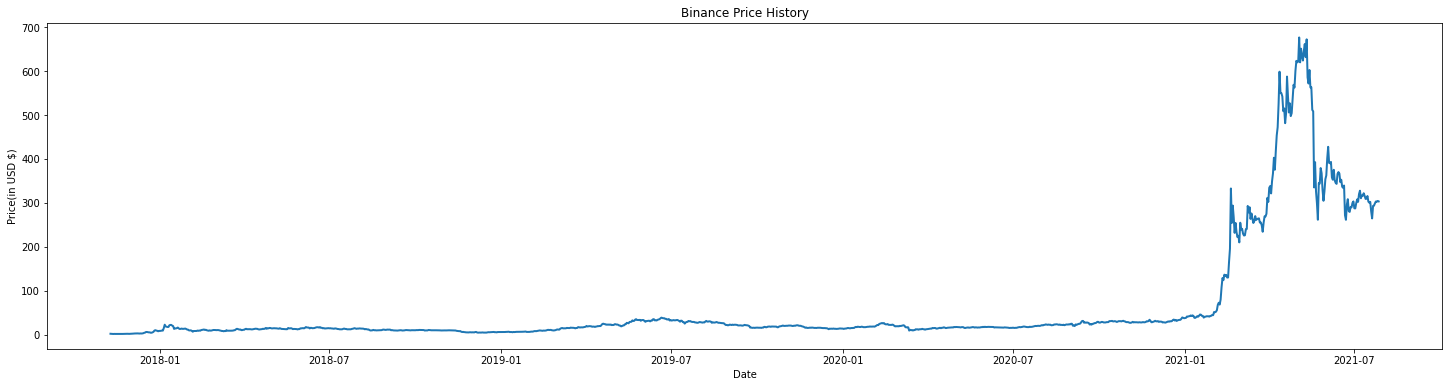

In [ ]:
#setting date as index
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

#plotting the binance price history (2017-20) on a line graph
plt.figure(figsize=(25,6))
plt.plot(df['Close'], label='Close Price history', linewidth = 2)
plt.title("Binance Price History")
plt.xlabel("Date")
plt.ylabel("Price(in USD $)")
plt.show()

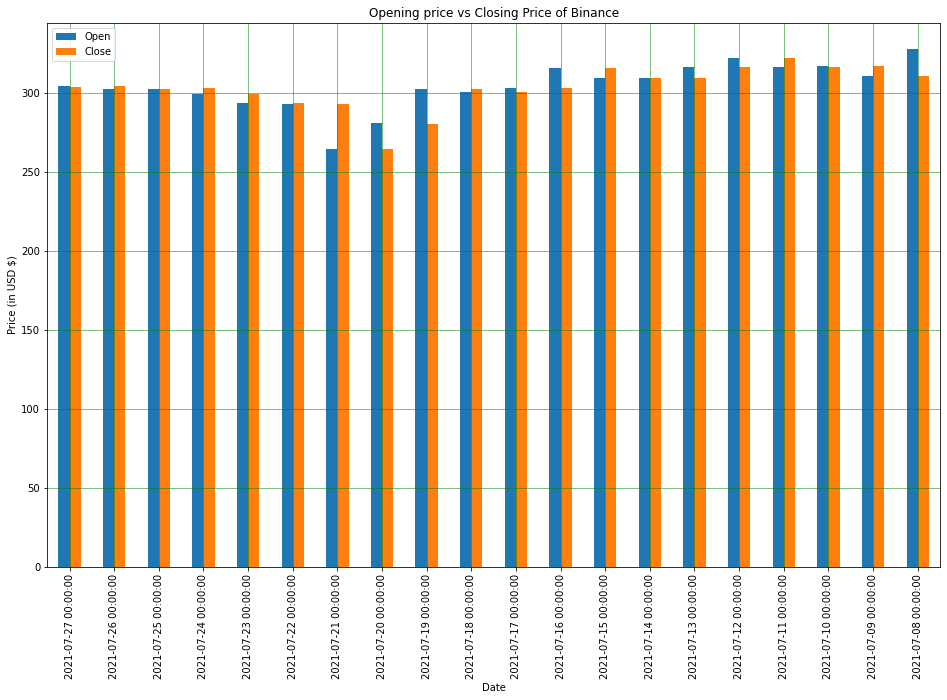

In [ ]:
# plotting the binance open vs close price data
df[['Open','Close']].head(20).plot(kind='bar',figsize=(16,10))
plt.title("Opening price vs Closing Price of Binance")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Date")
plt.ylabel("Price (in USD $)")
plt.show()

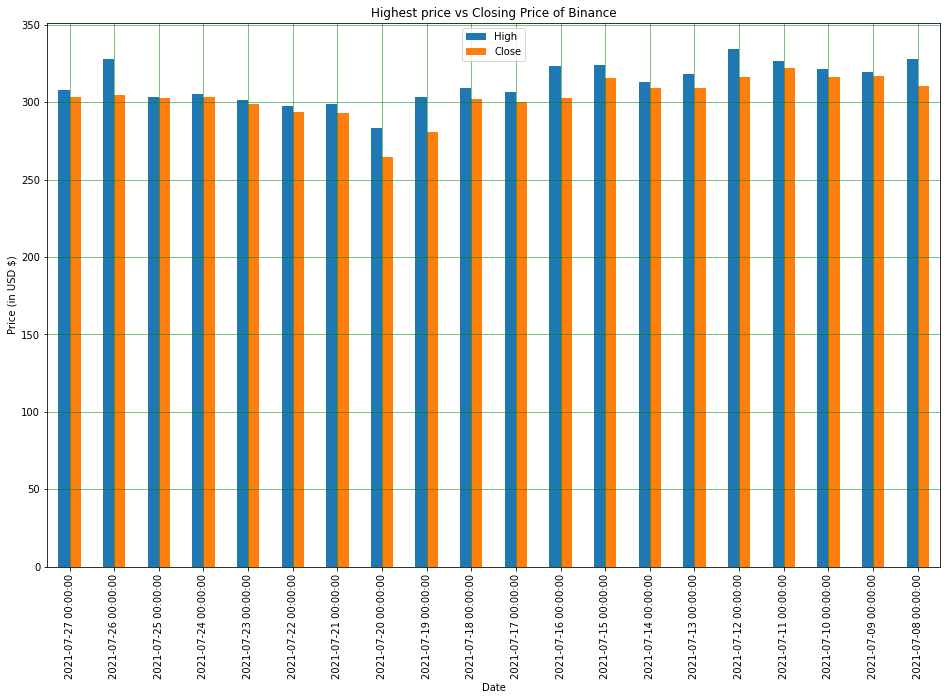

In [ ]:
# plotting the binance high vs close price data
df[['High','Close']].head(20).plot(kind='bar',figsize=(16,10))
plt.title("Highest price vs Closing Price of Binance")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Date")
plt.ylabel("Price (in USD $)")
plt.show()

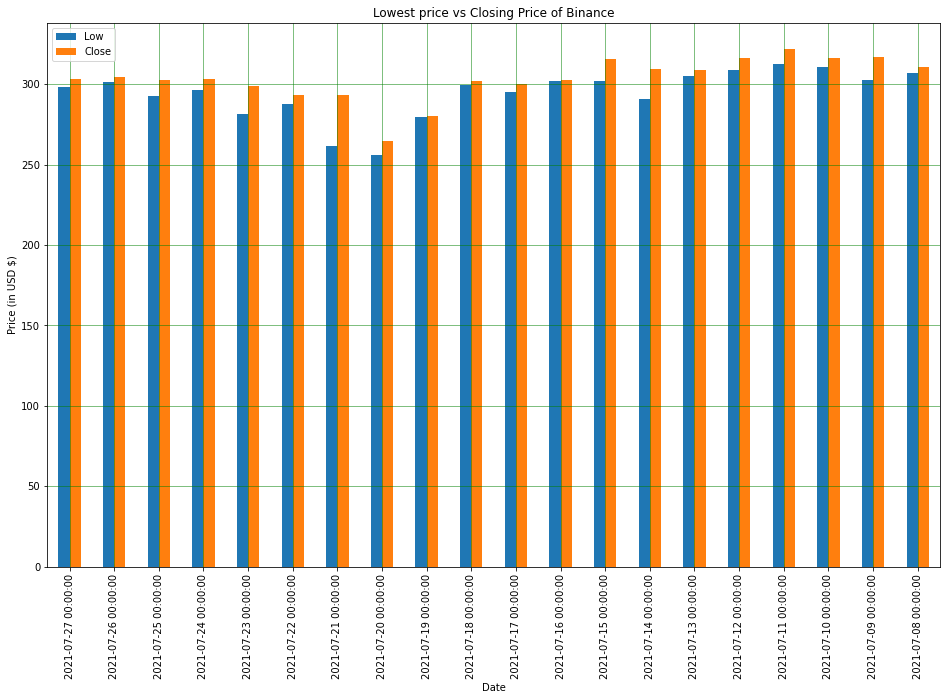

In [ ]:
# plotting the binance low vs close price data
df[['Low','Close']].head(20).plot(kind='bar',figsize=(16,10))
plt.title("Lowest price vs Closing Price of Binance")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Date")
plt.ylabel("Price (in USD $)")
plt.show()

#  Training and Testing of Model

In [ ]:
# The Date format can't be parsed and trained directly so we split the date column into day, month and year columns.

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
training_df = df[['Day','Month','Year','High','Open','Low','Change%', 'Close']]
training_df = training_df.reset_index(drop=True)
print(training_df.head(10))

   Day  Month  Year    High    Open     Low  Change%   Close
0   27      7  2021  307.62  304.31  298.53    -0.33  303.29
1   26      7  2021  327.62  302.60  301.19     0.58  304.31
2   25      7  2021  303.09  302.55  292.85    -0.19  302.57
3   24      7  2021  305.01  298.91  296.16     1.42  303.15
4   23      7  2021  301.15  293.51  281.68     1.83  298.89
5   22      7  2021  297.69  293.08  287.55     0.15  293.53
6   21      7  2021  298.69  264.59  261.51    10.77  293.08
7   20      7  2021  283.25  280.48  255.79    -5.66  264.59
8   19      7  2021  303.49  302.16  279.38    -7.18  280.47
9   18      7  2021  309.00  300.34  299.60     0.62  302.18


In [ ]:
#separate Independent and dependent variable
X = training_df.iloc[:, training_df.columns !='Close']
Y= training_df.iloc[:, 7]

# rechecking the selection quickly
print(X.shape) 
print(Y.shape) 

(1357, 7)
(1357,)


In [ ]:
# splitting the data set into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

#checking the distribution of data into the train-test datasets
print(x_train.shape)
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape)

# y_test is evaluated with y_pred for finding accuracy

(1017, 7)
(340, 7)
(1017,)
(340,)


## Linear Regression Model

In [ ]:
# Linear Regression Training

regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [ ]:
# We perform Cross Validation of Linear Regression Model using the K-Fold validation to reduce bias and overfitting in the model while rating the model.

from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10) 
results_kfold = model_selection.cross_val_score(regressor, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.92446311865012


In [ ]:
# Linear Regression actual vs predicted (testing)

plot_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
plot_df.head(20)
#tabular column of actual closing price vs predicted closing price.

,Actual,Predicted
788,32.93,32.623857
542,18.24,18.237209
1009,9.88,9.902262
965,6.06,6.460932
639,19.30,19.625865
778,31.99,31.862703
976,5.20,4.536234
265,26.94,26.188543
83,650.99,648.555332
1191,13.64,14.269056


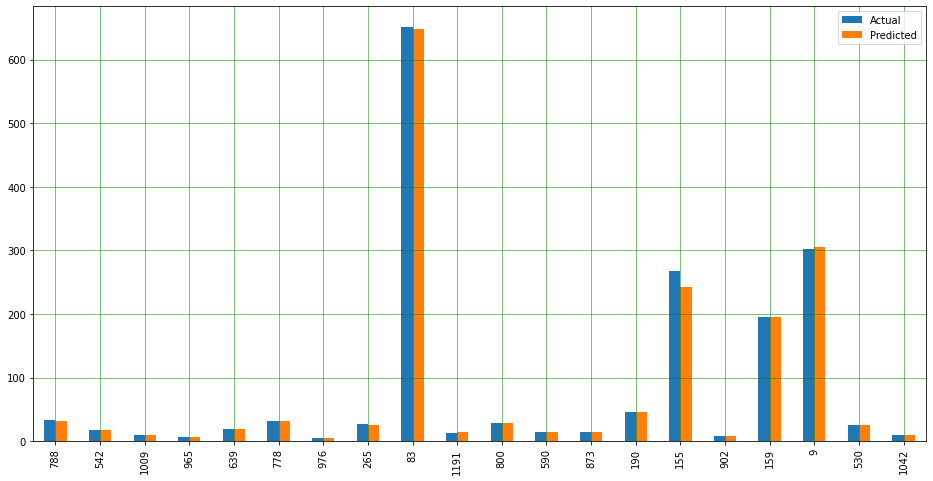

In [ ]:
# bar graph visualization of actual vs predicted closing prices
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##K Nearest Neighbour (KNN) Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 3)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

In [ ]:
knn_kfold = model_selection.KFold(n_splits=10)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy:", results_kfold.mean()*100)

Accuracy: 99.5696131813451


In [ ]:
#knn actual vs predicted (testing)

plot_knn_df=pd.DataFrame({'Actual':y_test,'Predicted':y_knn_pred})
plot_knn_df.head(20)

#tabular column of actual closing price vs predicted closing price.

,Actual,Predicted
788,32.93,33.533333
542,18.24,18.586667
1009,9.88,10.153333
965,6.06,5.063333
639,19.30,19.630000
778,31.99,31.113333
976,5.20,5.313333
265,26.94,27.726667
83,650.99,646.093333
1191,13.64,13.883333


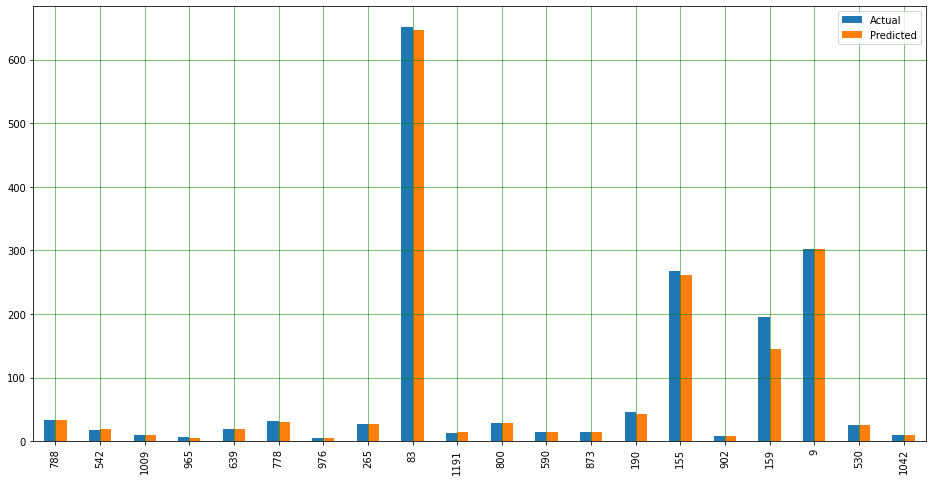

In [ ]:
# bar graph visualization of actual vs predicted closing prices
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Error Analysis

## RMSE Error
Root Mean Square Error (RMSE) is the standard deviation of the prediction errors.  It basically tells us how concentrated the data is around the line of best fit.
The mathematical formula for RMSE Error score = (((Y_test - predicted_values)^ 2).sum()/len(predicted_values)) ^ 0.5)


In [ ]:
#RMSE of Linear Regression Model

from sklearn.metrics import mean_squared_error
import math

regressor_rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print(" The Root Mean Square Error (RMSE) of the Linear Regression Model is ", round(regressor_rmse, 3))

 The Root Mean Square Error (RMSE) of the Linear Regression Model is  3.397


In [ ]:
#RMSE of KNN Model

knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print("The RMSE of the KNN Model is ", round((knn_mse), 3))

The RMSE of the KNN Model is  5.467


## R2 Error
R2 error symbolises the variance of the expected vs predicted values. It basically shows how well fit the graph will be. The values vary from 0% to 100%. The higher the value of R2, the more well fit and accurate the model is.

The mathematical formula for r2 score = (y_test[i] — y_pred[i])**2


In [ ]:
# R2 score of Linear Regression Model
from sklearn.metrics import r2_score
import math
print("R2 score of Linear Regression Model is : ", round(r2_score(y_test, y_pred), 3))

R2 score of Linear Regression Model is :  0.999


In [ ]:
# R2 score of KNN Model
print("R2 score of KNN Model is : ", round(r2_score(y_test, y_knn_pred), 3))

R2 score of KNN Model is :  0.998
